In [1]:
import numpy as np
import networkx as nx
import collections
import matplotlib.pyplot as plt
import random

In [2]:
n=6
threshold =0.7


In [3]:
def connectgraph(mat, n, threshold):
    for i in range(n):
        for j in range(i+1,n):
            r = random.random();
            if r > threshold:
                mat[i][j] = 1;
                
    return mat

In [4]:
def checkconnected(mat, n, i, visit):
    for j in range(i+1, n):
        if ( int(visit[j])!=1 & int(mat[i][j])==1):
            visit[j]=1;
            visit = checkconnected(mat, n, j, visit)
            
    return visit


In [5]:

def checkvisit(visit, n):
    for i in range(n):
        if visit[i]==0:
            return 0
    return 1


In [6]:

for it in range(50):
    mat = np.zeros((n,n))
    mat = connectgraph(mat, n, threshold)
    visit = np.zeros(n)
    visit[0] = 1;
    visit = checkconnected(mat, n, 0, visit)
    
    if checkvisit(visit, n)==1:
        break

print("No. of Iterations = ", it)
print(mat,"\n\n\n")
print(visit)

No. of Iterations =  12
[[0. 1. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]] 



[1. 1. 1. 1. 1. 1.]


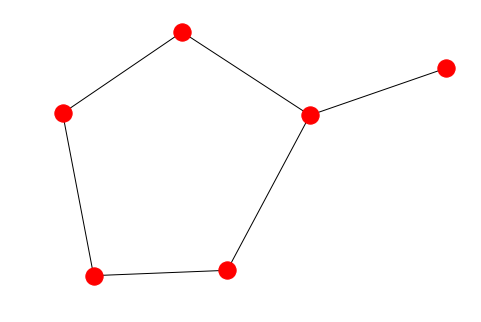

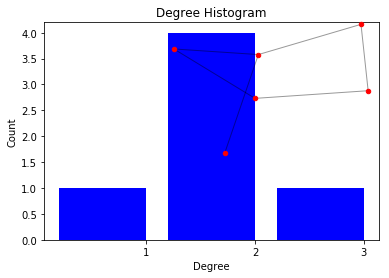

In [7]:
g = nx.from_numpy_array(mat)

nx.draw(g,label=True)

G = nx.from_numpy_array(mat)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()